In [1]:
import pandas as pd
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn import model_selection
from sklearn import feature_selection

import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("/data/credit-default.csv")

In [3]:
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
checking_balance        1000 non-null object
months_loan_duration    1000 non-null int64
credit_history          1000 non-null object
purpose                 1000 non-null object
amount                  1000 non-null int64
savings_balance         1000 non-null object
employment_length       1000 non-null object
installment_rate        1000 non-null int64
personal_status         1000 non-null object
other_debtors           1000 non-null object
residence_history       1000 non-null int64
property                1000 non-null object
age                     1000 non-null int64
installment_plan        1000 non-null object
housing                 1000 non-null object
existing_credits        1000 non-null int64
default                 1000 non-null int64
dependents              1000 non-null int64
telephone               1000 non-null object
foreign_worker          1000 non-null object
jo

In [5]:
df.default.value_counts()

1    700
2    300
Name: default, dtype: int64

In [6]:
y = np.where(df.default == 2, 1, 0)
X = df.copy()
target = "default"
del X[target]
X = pd.get_dummies(X)
columns = X.columns
X = StandardScaler().fit_transform(X)
pd.DataFrame(X, columns=columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)


In [7]:
lr = linear_model.LogisticRegression(random_state=1)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.75666666666666671

In [8]:
y_test_pred = lr.predict(X_test)
pd.DataFrame({"actual": y_test, "pred": y_test_pred}).head()

,actual,pred
0,1,0
1,0,1
2,0,0
3,1,1
4,1,1


In [9]:
metrics.confusion_matrix(y_test, y_test_pred)

array([[188,  26],
       [ 47,  39]])

In [10]:
pd.DataFrame(lr.predict_proba(X_test))

,0,1
0,0.609788,0.390212
1,0.056675,0.943325
2,0.794803,0.205197
3,0.388060,0.611940
4,0.156862,0.843138
5,0.351440,0.648560
6,0.556062,0.443938
7,0.735745,0.264255
8,0.930952,0.069048
9,0.783465,0.216535


In [13]:
y_test_prob = lr.predict_proba(X_test)[:, 1]
y_test_pred = np.where(y_test_prob > 0.3, 1, 0)
print("Accuracy", metrics.accuracy_score(y_test, y_test_pred))
metrics.confusion_matrix(y_test, y_test_pred)

Accuracy 0.71


array([[158,  56],
       [ 31,  55]])

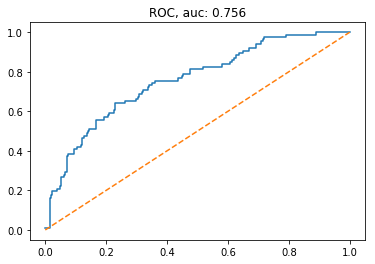

In [21]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_prob)

plt.plot(fpr, tpr)
plt.title("ROC, auc: %.3f" % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1], ls = "--")

In [2]:
df = pd.read_csv("/data/creditcard-fraud.csv")

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [4]:
y = df.Class
y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [5]:
284315 /  len(y)

0.9982725143693799

In [6]:
X = df.iloc[:, 1:-2]
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153


In [34]:
X.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,...,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =1)

In [104]:
%%time
lr = linear_model.LogisticRegression(random_state=1)
lr.fit(X_train, y_train)

CPU times: user 1.97 s, sys: 72.3 ms, total: 2.04 s
Wall time: 2.08 s


In [105]:
y_test_pred = np.where(lr.predict_proba(X_test)[:, 1] > 0.5, 1, 0)
metrics.confusion_matrix(y_test, y_test_pred)

array([[85293,    15],
       [   57,    78]])

In [65]:
metrics.f1_score(y_test, y_test_pred)

0.68421052631578949

In [37]:
from collections import Counter

In [38]:
Counter(y_test)

Counter({0: 85308, 1: 135})

In [43]:
78/135, 78/(78+15)

(0.5777777777777777, 0.8387096774193549)

In [44]:
85/135, 85/(85 + 21)

(0.6296296296296297, 0.8018867924528302)

In [67]:
y_test_prob = lr.predict_proba(X_test)[:, 1]
y_test_pred = np.where(y_test_prob > 0.5, 1, 0)
metrics.confusion_matrix(y_test, y_test_pred)
metrics.f1_score(y_test, y_test_pred)

0.68421052631578949

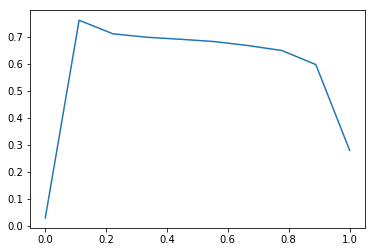

In [70]:
scores = {}
for t in np.linspace(0.001, 0.9999, 10):
    y_test_pred = np.where(lr.predict_proba(X_test)[:, 1] > t, 1, 0)
    scores[t] = metrics.f1_score(y_test, y_test_pred)
plt.plot(pd.Series(scores));

In [116]:
%%time
est = linear_model.SGDClassifier(loss="log", alpha=0.0001, learning_rate="invscaling", 
                                 eta0=1.0, random_state=1, n_jobs = 2,
                                 tol = 1e-10, max_iter=100)
est.fit(X_train, y_train)
print("n_iter: ", est.n_iter_)

n_iter:  12
CPU times: user 665 ms, sys: 21.4 ms, total: 686 ms
Wall time: 686 ms


In [117]:
y_test_prob = est.predict_proba(X_test)[:, 1]
y_test_pred = np.where(y_test_prob > 0.5, 1, 0)
fpr, tpr, _ = metrics.roc_curve(y_test, y_test_pred)
print("f1: ", metrics.f1_score(y_test, y_test_pred), "auc: ", metrics.auc(fpr, tpr))
metrics.confusion_matrix(y_test, y_test_pred)

f1:  0.687224669604 auc:  0.788806833279


array([[85294,    14],
       [   57,    78]])

In [ ]:
`